## Model Training  
**Objective:**  
  
- 	Train various machine learning models.  
  
-  Perform hyperparameter tuning.  
  
- Evaluate models using appropriate metrics.

### Import Libraries and Load Data

In [6]:
import pandas as pd
import numpy as np

# Scikit-learn modules
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

# Imbalanced-learn module
from imblearn.over_sampling import SMOTE


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

X = pd.read_csv('../data/processed/X_features.csv')
y = pd.read_csv('../data/processed/y_target.csv')

### Train-Test Splits

In [2]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

### Handle Class Imbalance

In [3]:

sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

## Model Training  
  
**Models to Train:**  
  
- Logistic Regression  
  
- Decision Tree  

- Random Forest  
  
- XGBoost

In [9]:
# Initialize models with default parameters
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
}

def train_evaluate_model(model, X_train, y_train, X_test, y_test):
    # Train the model
    model.fit(X_train, y_train)
    
    # Predict on test data
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    # Evaluate performance
    print(f"Model: {model.__class__.__name__}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{model.__class__.__name__} Confusion Matrix")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    # ROC AUC Score
    roc_auc = roc_auc_score(y_test, y_pred_proba)
    print(f"ROC AUC Score: {roc_auc:.4f}")
    
    # ROC Curve
    fpr, tpr = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f"{model.__class__.__name__} (area = {roc_auc:.2f})")
    plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f"{model.__class__.__name__} ROC Curve")
    plt.legend(loc='lower right')
    plt.show()
    
    return roc_auc

### Train and Evaluate the Model

Training and Evaluating Logistic Regression
Model: LogisticRegression
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.78      0.87     27845
           1       0.20      0.75      0.31      2001

    accuracy                           0.78     29846
   macro avg       0.59      0.77      0.59     29846
weighted avg       0.93      0.78      0.83     29846



/Users/mustafaelzowawi/Desktop/Project/credit_score_web_app/venv/lib/python3.9/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


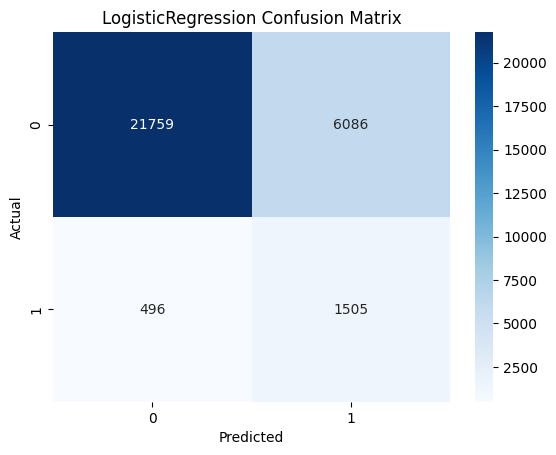

ROC AUC Score: 0.8361


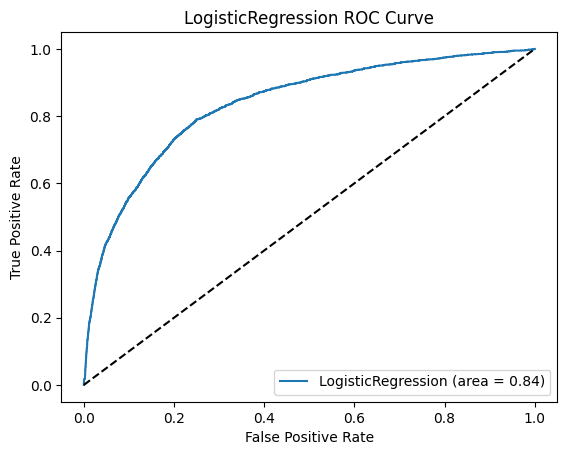

Training and Evaluating Decision Tree
Model: DecisionTreeClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.92      0.94     27845
           1       0.23      0.33      0.27      2001

    accuracy                           0.88     29846
   macro avg       0.59      0.62      0.60     29846
weighted avg       0.90      0.88      0.89     29846



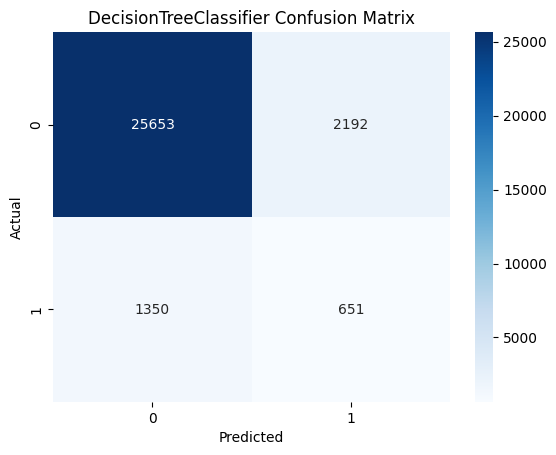

ROC AUC Score: 0.6235


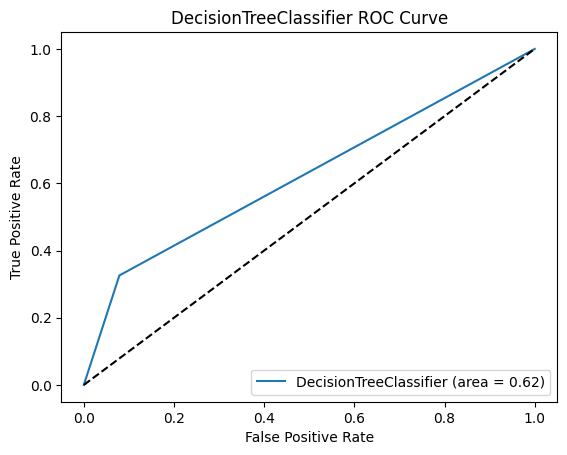

Training and Evaluating Random Forest


/Users/mustafaelzowawi/Desktop/Project/credit_score_web_app/venv/lib/python3.9/site-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Model: RandomForestClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     27845
           1       0.40      0.31      0.35      2001

    accuracy                           0.92     29846
   macro avg       0.68      0.64      0.65     29846
weighted avg       0.91      0.92      0.92     29846



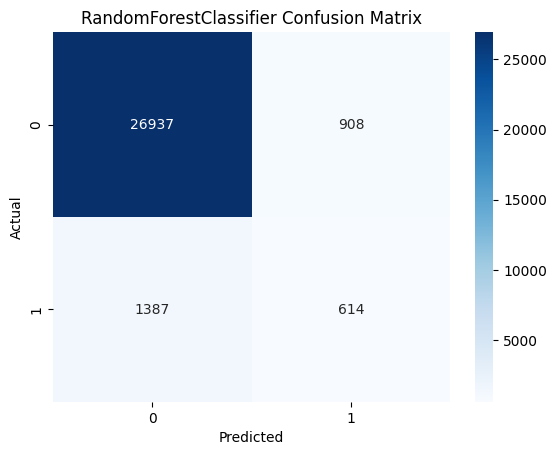

ROC AUC Score: 0.8290


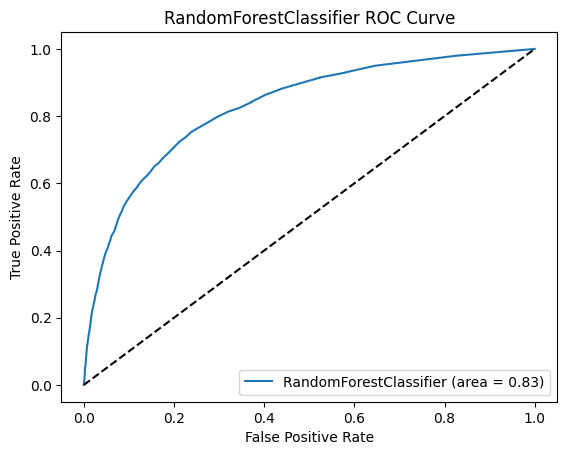

Training and Evaluating XGBoost


/Users/mustafaelzowawi/Desktop/Project/credit_score_web_app/venv/lib/python3.9/site-packages/xgboost/core.py:158: UserWarning: [21:09:16] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Model: XGBClassifier
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     27845
           1       0.46      0.30      0.36      2001

    accuracy                           0.93     29846
   macro avg       0.70      0.64      0.66     29846
weighted avg       0.92      0.93      0.92     29846



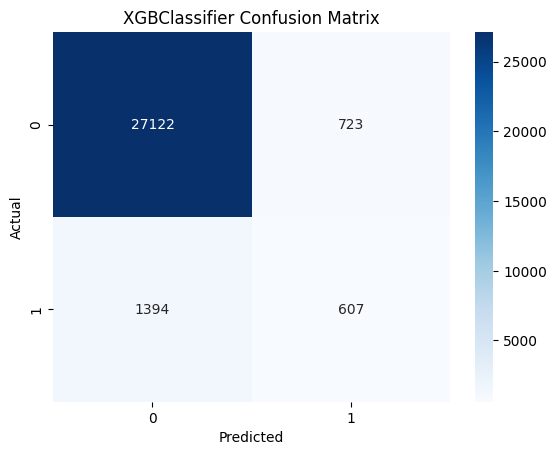

ROC AUC Score: 0.8459


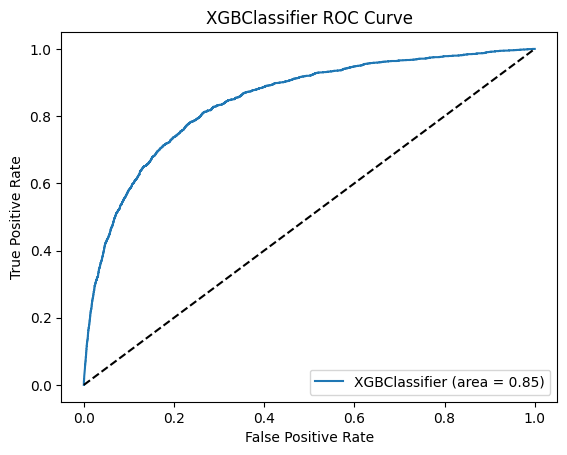

In [10]:
model_performance = {}

for model_name, model in models.items():
    print("="*60)
    print(f"Training and Evaluating {model_name}")
    print("="*60)
    roc_auc = train_evaluate_model(model, X_train_res, y_train_res, X_test, y_test)
    model_performance[model_name] = roc_auc

### Compare Model Performance

In [11]:
# Display ROC AUC scores for all models
performance_df = pd.DataFrame.from_dict(model_performance, orient='index', columns=['ROC AUC Score'])
performance_df.sort_values(by='ROC AUC Score', ascending=False, inplace=True)
print(performance_df)

                     ROC AUC Score
XGBoost                   0.845920
Logistic Regression       0.836053
Random Forest             0.829034
Decision Tree             0.623490


### Hyperparameter Tuning for Best Model (XGBoost)

In [30]:
# Define parameter grid for XGBoost
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Initialize XGBoost model
xgb = XGBClassifier( eval_metric='logloss', random_state=42)

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=2
)

# Fit GridSearchCV
grid_search_xgb.fit(X_train_res, y_train_res)

print(f"Best Parameters: {grid_search_xgb.best_params_}")
print(f"Best ROC AUC Score: {grid_search_xgb.best_score_:.4f}")

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=1.0; total time=   1.1s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.3s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.2s
[CV] END colsample_bytree=0.8, learning_rate=0.01, max_depth=3, n_estimators=100, subsample=0.8; total time=   1.3s
[CV] END 

### Evaluate the Tuned Model on the Test Set

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.98      0.96     27845
           1       0.44      0.26      0.33      2001

    accuracy                           0.93     29846
   macro avg       0.70      0.62      0.64     29846
weighted avg       0.91      0.93      0.92     29846



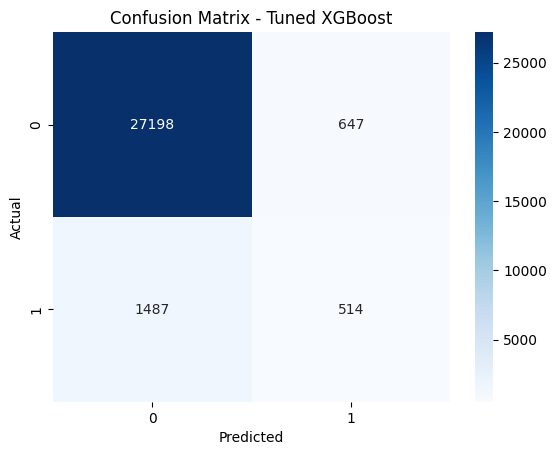

Test ROC AUC Score: 0.8372


In [32]:
best_xgb = grid_search_xgb.best_estimator_

# Predict on the test set
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

# Evaluate performance

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC AUC Score
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test ROC AUC Score: {test_roc_auc:.4f}")

### Adjusting Hyperparameters:  
- **Reducing Model Complexity**  
  
- **Modifying Learning Rate**

In [35]:
# Adjust Hyperparameters
param_grid_xgb_adjusted = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
    'reg_alpha': [0, 0.1],
    'reg_lambda': [1, 10]
}

# Initialize XGBoost model
xgb = XGBClassifier( eval_metric='logloss', random_state=42)

# Initialize StratifiedKFold
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Initialize GridSearchCV
grid_search_xgb_adjusted = GridSearchCV(
    estimator=xgb,
    param_grid=param_grid_xgb_adjusted,
    scoring='roc_auc',
    cv=cv,
    n_jobs=-1,
    verbose=1
)

# Fit GridSearchCV
grid_search_xgb_adjusted.fit(X_train_res, y_train_res)

print(f"Best Parameters: {grid_search_xgb_adjusted.best_params_}")
print(f"Best ROC AUC Score: {grid_search_xgb_adjusted.best_score_:.4f}")

Fitting 5 folds for each of 128 candidates, totalling 640 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'reg_alpha': 0, 'reg_lambda': 1, 'subsample': 0.8}
Best ROC AUC Score: 0.9786


### Evaluating the Adjustments

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     27845
           1       0.41      0.36      0.38      2001

    accuracy                           0.92     29846
   macro avg       0.68      0.66      0.67     29846
weighted avg       0.92      0.92      0.92     29846



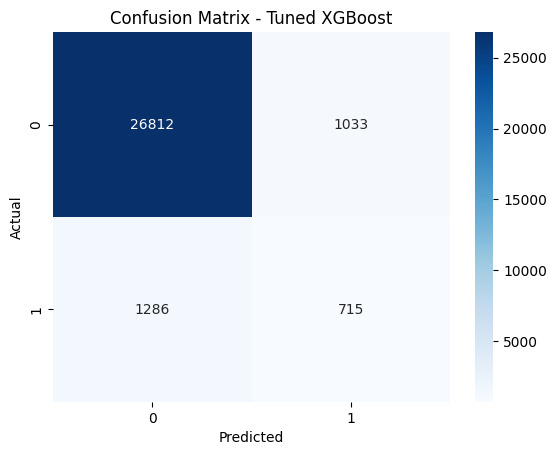

Test ROC AUC Score: 0.8523


In [36]:
best_xgb = grid_search_xgb_adjusted.best_estimator_

# Predict on the test set
y_pred = best_xgb.predict(X_test)
y_pred_proba = best_xgb.predict_proba(X_test)[:, 1]

# Evaluate performance

print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Tuned XGBoost')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC AUC Score
test_roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"Test ROC AUC Score: {test_roc_auc:.4f}")

###  Save the Final Model

In [38]:
import joblib

# Save the model
joblib.dump(best_xgb, '../models/credit_model.pkl')

['../models/credit_model.pkl']